## Homework 2: Combined Cycle Power Plant Data Set
September 23, 2022<br>
Vivian Lin<br>
ID: 6043749830<br>
Dr. Mohammad Rajati

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

<b>a) Download the Combined Cycle Power Plant data from https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant<br></b>
    AT: Ambient Temperature, V: Exhaust Vaccum, AP: Ambient Pressure, RH: Relative Humidity, PE: Net hourly electrical energy output

In [2]:
# Using relative path for the data.
df = pd.read_excel("../data/CCPP/Folds5x2_pp.xlsx", sheet_name=0, index_col=False)
df.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


<b>Exploring the data:<br>
    bi) How many rows are in this data set? How many columns? What do the rows and columns represent?</b>

In [3]:
print(f"There are {df.shape[0]} rows in the data and {df.shape[1]} columns.")

There are 9568 rows in the data and 5 columns.


Ans: The rows represent data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when  power plant was set to work with full load. The first four columns are the ambient variables measured (independent variables) and the last column is the predicted net hourly electrical energy output (using the first four columns, dependent variable).

<b>bii) Make pairwise scatterplots of all variables in data set inlcuding the predictors with dependent variables. Describe findings.</b>

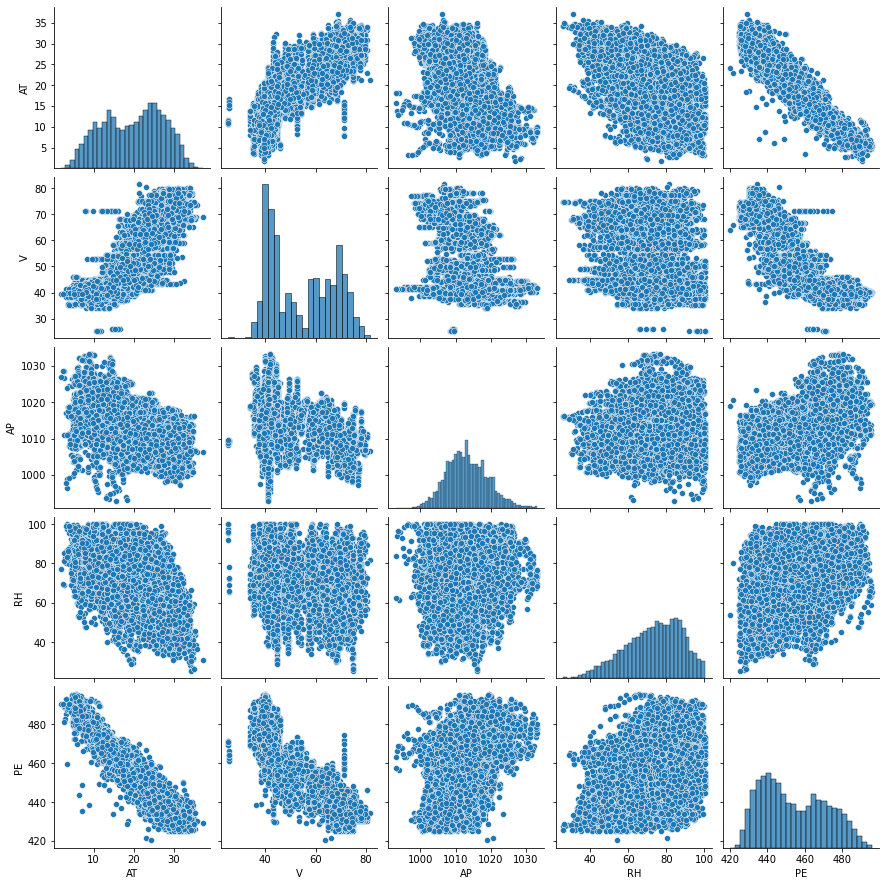

In [4]:
sns.pairplot(df)
plt.show()

In [5]:
print("Out of the four independent variables, PE seems to be correlated with AT and V.")

Out of the four independent variables, PE seems to be correlated with AT and V.


<b>biii) What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.</b>

In [6]:
table = pd.DataFrame(data=[df.mean(), df.median(), df.max()-df.min(), df.quantile(0.25), df.quantile(0.75), df.quantile(0.75)-df.quantile(0.25)],
                     index=["Mean", "Median", "Range", "1st Quartile", "3rd Quartile", "IQR"])
table

,AT,V,AP,RH,PE
Mean,19.651231,54.305804,1013.259078,73.308978,454.365009
Median,20.345000,52.080000,1012.940000,74.975000,451.550000
Range,35.300000,56.200000,40.410000,74.600000,75.500000
1st Quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
3rd Quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
IQR,12.210000,24.800000,8.160000,21.502500,28.680000


<b>c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the model is there a statistically significnat association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from data for each of these regression tasks?</b>

In [7]:
Y = df['PE']

# Simple linear regression for AT vs PE.
X = df['AT']
X = sm.add_constant(X)
AT_res = sm.OLS(Y, X).fit()
print("AT vs PE:\n", AT_res.summary())

# Simple linear regression for V vs PE.
X = df['V']
X = sm.add_constant(X)
V_res = sm.OLS(Y, X).fit()
print("V vs PE:\n", V_res.summary())

# Simple linear regression for AP vs PE.
X = df['AP']
X = sm.add_constant(X)
AP_res = sm.OLS(Y, X).fit()
print("AP vs PE:\n", AP_res.summary())

# Simple linear regression for RH vs PE.
X = df['RH']
X = sm.add_constant(X)
RH_res = sm.OLS(Y, X).fit()
print("RH vs PE:\n", RH_res.summary())

AT vs PE:
                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:46:58   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.2

In [8]:
print("Ans: p-values in the models in all models (AT, V, AP, RH vs PE) are statistically significant.")

Ans: p-values in the models in all models (AT, V, AP, RH vs PE) are statistically significant.


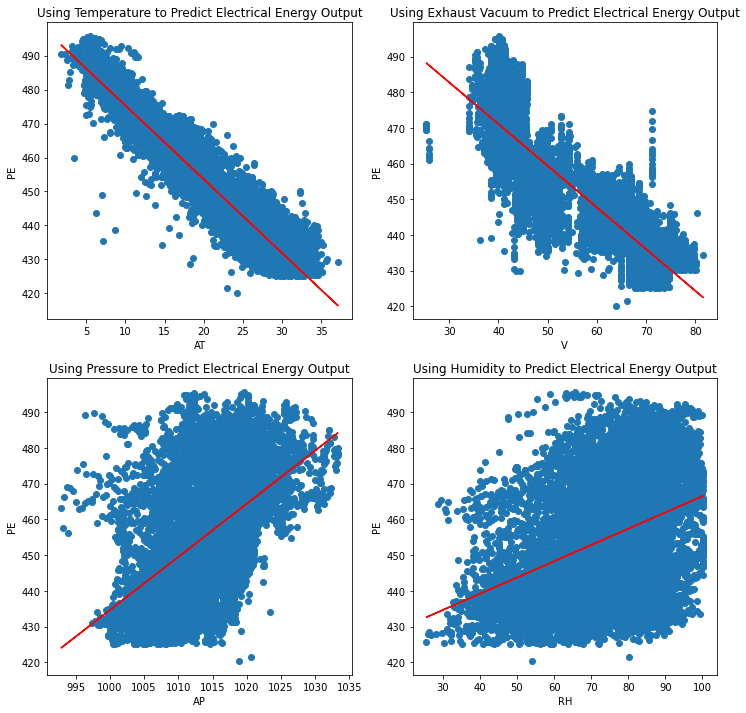

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Plot AT vs PE and its regression line as calculated by model.
ax[0, 0].scatter(x=df['AT'], y=df['PE'])
ax[0, 0].plot(df['AT'], AT_res.params[0] + AT_res.params[1] * df['AT'], color="r")
ax[0, 0].set_xlabel("AT")
ax[0, 0].set_ylabel("PE")
ax[0, 0].set_title("Using Temperature to Predict Electrical Energy Output")

# Plot V vs PE and its regression line as calculated by model.
ax[0, 1].scatter(x=df['V'], y=df['PE'])
ax[0, 1].plot(df['V'], V_res.params[0] + V_res.params[1] * df['V'], color="r")
ax[0, 1].set_xlabel("V")
ax[0, 1].set_ylabel("PE")
ax[0, 1].set_title("Using Exhaust Vacuum to Predict Electrical Energy Output")

# Plot AP vs PE and its regression line as calculated by model.
ax[1, 0].scatter(x=df['AP'], y=df['PE'])
ax[1, 0].plot(df['AP'], AP_res.params[0] + AP_res.params[1] * df['AP'], color="r")
ax[1, 0].set_xlabel("AP")
ax[1, 0].set_ylabel("PE")
ax[1, 0].set_title("Using Pressure to Predict Electrical Energy Output")

# Plot RH vs PE and its regression line as calculated by model.
ax[1, 1].scatter(x=df['RH'], y=df['PE'])
ax[1, 1].plot(df['RH'], RH_res.params[0] + RH_res.params[1] * df['RH'], color="r")
ax[1, 1].set_xlabel("RH")
ax[1, 1].set_ylabel("PE")
ax[1, 1].set_title("Using Humidity to Predict Electrical Energy Output")

plt.show()

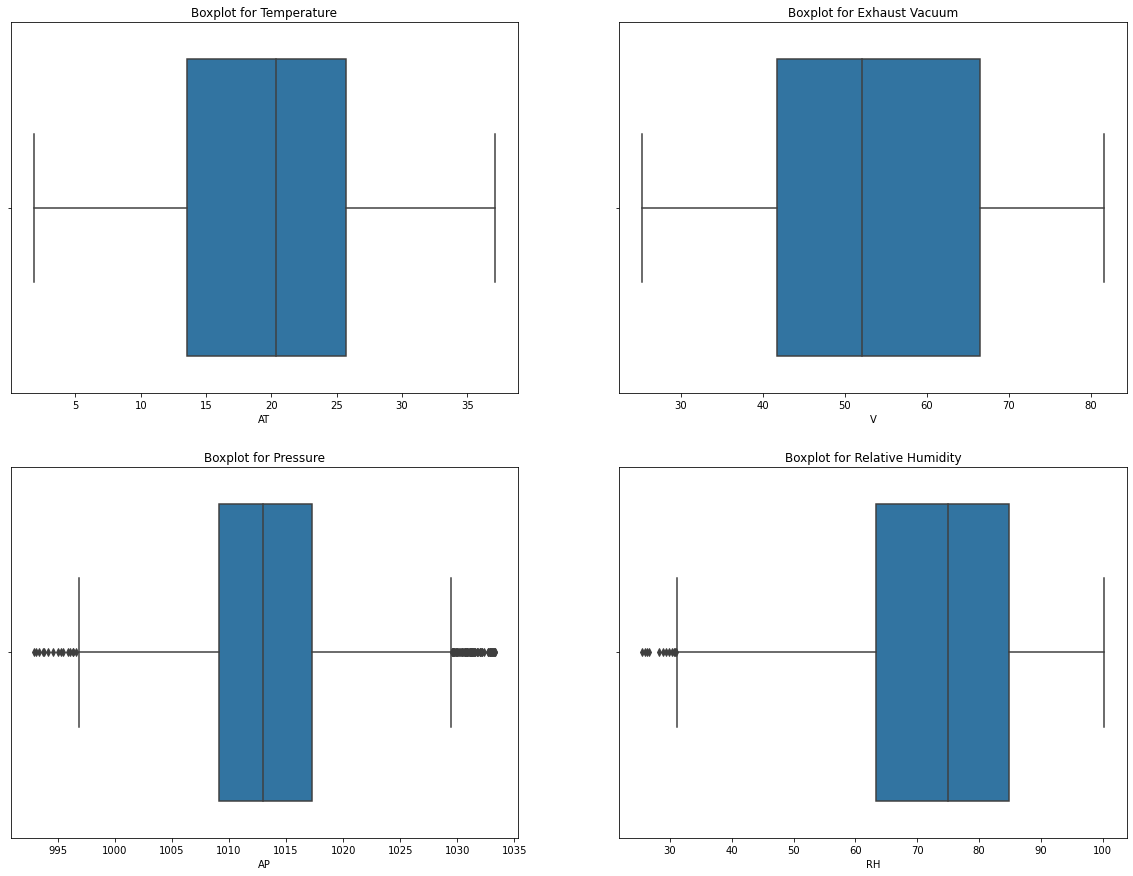

In [10]:
# Plot boxplots to show outliers.

fig, ax = plt.subplots(2, 2, figsize=(20, 15))

# Plot AT boxplot.
sns.boxplot(ax=ax[0, 0], x=df['AT'])
ax[0, 0].set_title("Boxplot for Temperature")

# Plot V boxplot.
sns.boxplot(ax=ax[0, 1], x=df['V'])
ax[0, 1].set_title("Boxplot for Exhaust Vacuum")

# Plot AP boxplot.
sns.boxplot(ax=ax[1, 0], x=df['AP'])
ax[1, 0].set_title("Boxplot for Pressure")

# Plot RH boxplot.
sns.boxplot(ax=ax[1, 1], x=df['RH'])
ax[1, 1].set_title("Boxplot for Relative Humidity")

plt.show()

Cook's Distance threshold 4/n: 0.0004180602006688963


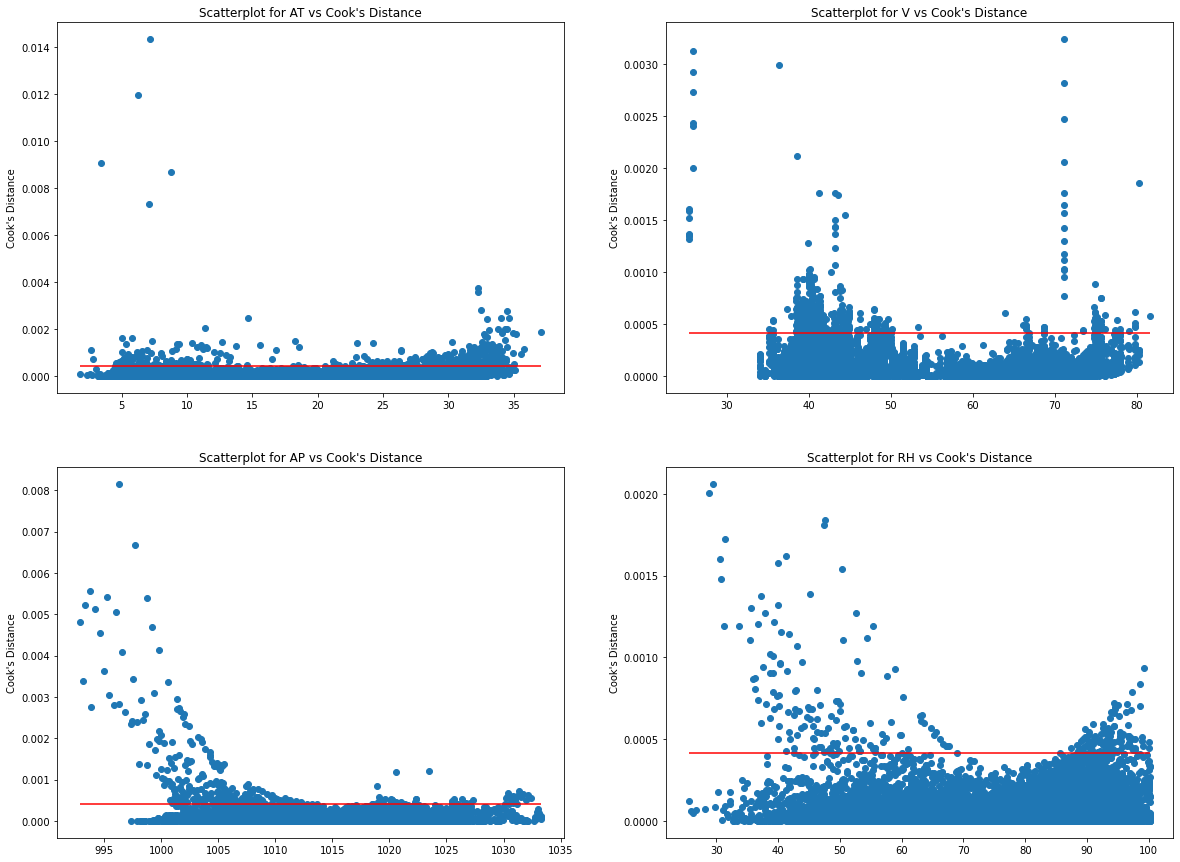

In [11]:
# Calculate Cook's distance to determine number of outliers.
AT_cook = AT_res.get_influence().cooks_distance
V_cook = V_res.get_influence().cooks_distance
AP_cook = AP_res.get_influence().cooks_distance
RH_cook = RH_res.get_influence().cooks_distance

# 4/n rule
c_d = 4 / df.shape[0]
print(f"Cook's Distance threshold 4/n: {c_d}")

# Plot Cook's distance.
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

ax[0, 0].scatter(x=df['AT'], y=AT_cook[0])
ax[0, 0].hlines(y=c_d, xmin=df['AT'].min(), xmax=df['AT'].max(), color="r")
ax[0, 0].set_ylabel("Cook's Distance")
ax[0, 0].set_title("Scatterplot for AT vs Cook's Distance")

ax[0, 1].scatter(x=df['V'], y=V_cook[0])
ax[0, 1].hlines(y=c_d, xmin=df['V'].min(), xmax=df['V'].max(), color="r")
ax[0, 1].set_ylabel("Cook's Distance")
ax[0, 1].set_title("Scatterplot for V vs Cook's Distance")

ax[1, 0].scatter(x=df['AP'], y=AP_cook[0])
ax[1, 0].hlines(y=c_d, xmin=df['AP'].min(), xmax=df['AP'].max(), color="r")
ax[1, 0].set_ylabel("Cook's Distance")
ax[1, 0].set_title("Scatterplot for AP vs Cook's Distance")

ax[1, 1].scatter(x=df['RH'], y=RH_cook[0])
ax[1, 1].hlines(y=c_d, xmin=df['RH'].min(), xmax=df['RH'].max(), color="r")
ax[1, 1].set_ylabel("Cook's Distance")
ax[1, 1].set_title("Scatterplot for RH vs Cook's Distance")

plt.show()

In [12]:
print("There are mutliple outliers for df['AP'] and df['RH'] that can be removed as calculated by seaborn package using IQR.")
print("From Cook's distance, there are datapoints in all four predictors that needs to be examined.")

There are mutliple outliers for df['AP'] and df['RH'] that can be removed as calculated by seaborn package using IQR.
From Cook's distance, there are datapoints in all four predictors that needs to be examined.


<b>d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?</b>

In [13]:
# Multiple linear regression.
X = df[['AT', 'V', 'AP', 'RH']]
Y = df['PE']
X = sm.add_constant(X)
m_res = sm.OLS(Y, X).fit()
print("Multiple regression:\n", m_res.summary())

Multiple regression:
                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:46:59   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.7

In [14]:
print("We have enough evidence to reject the null hypothesis for all predictors.")

We have enough evidence to reject the null hypothesis for all predictors.


<b>e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis and the multiple regression coefficients from 1d on the y-axis. Each predictor is displayed as a single point in the plot.</b>

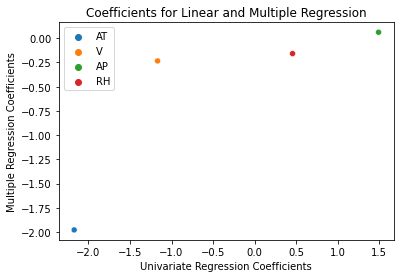

In [15]:
coef_tb = pd.DataFrame(data={'Univariate': [AT_res.params['AT'], V_res.params['V'], AP_res.params['AP'], RH_res.params['RH']],
                            'Multiple': [m_res.params['AT'], m_res.params['V'], m_res.params['AP'], m_res.params['RH']]},
                      index=["AT", "V", "AP", "RH"])
sns.scatterplot(x=coef_tb['Univariate'], y=coef_tb['Multiple'], hue=coef_tb.index)
plt.xlabel("Univariate Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")
plt.title("Coefficients for Linear and Multiple Regression")
plt.show()

<b>f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for ecah predictor X, fit a model of Y =β0 +β1X+β2X2 +β3X3 +ε<br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html</b>

In [16]:
poly = PolynomialFeatures(degree=3)

# Fit to AT.
AT_pf = poly.fit_transform(df['AT'].to_numpy().reshape(-1, 1))
AT_poly = sm.OLS(Y, AT_pf).fit()
print("AT vs PE:\n", AT_poly.summary())

# Fit to V.
V_pf = poly.fit_transform(df['V'].to_numpy().reshape(-1, 1))
V_poly = sm.OLS(Y, V_pf).fit()
print("V vs PE:\n", V_poly.summary())

# Fit to AP.
AP_pf = poly.fit_transform(df['AP'].to_numpy().reshape(-1, 1))
AP_poly = sm.OLS(Y, AP_pf).fit()
print("AP vs PE:\n", AP_poly.summary())

# Fit to RH.
RH_pf = poly.fit_transform(df['RH'].to_numpy().reshape(-1, 1))
RH_poly = sm.OLS(Y, RH_pf).fit()
print("RH vs PE:\n", RH_poly.summary())

AT vs PE:
                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:46:59   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.2

In [17]:
print("There is evidence that nonlinear association exists between all predictors and the response as all p-values of x3 are less than 0.05.")

There is evidence that nonlinear association exists between all predictors and the response as all p-values of x3 are less than 0.05.


<b>g) Is there evidence of association of interactions of predictors with the response? Run a full linear regression model with all pairwise intereaction terms and state whether any interaction terms are statistically significant.</b>

In [18]:
# Implement pairwise.
poly = PolynomialFeatures(degree=2)
# Get the polynomial features for all predictors.
pred = df[['AT', 'V', 'AP', 'RH']]
pred_pf = poly.fit_transform(pred)

# Fit linear regression model.
pred_poly = sm.OLS(Y, pred_pf).fit()
print(pred_poly.summary(), '\n')
# Print out the column names for original and interaction terms.
print(poly.get_feature_names_out(pred.columns))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.030e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:46:59   Log-Likelihood:                -27431.
No. Observations:                9568   AIC:                         5.489e+04
Df Residuals:                    9553   BIC:                         5.500e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7503.7323   1207.276     -6.215      0.0

In [19]:
# PE = b0 + b1 AT + b2 V + b3 AP + b4 RH + b5 AT^2 + b6 AT V + b7 AT AP + b8 AT RH + 
# b9 V^2 + b10 V AP + b11 V RH + b12 AP^2 + b13 AP RH + b14 RH^2
# To be statistically significant, p-value must be less than 0.05.
print("Interaction terms are: x6, x7, x8, x10, x11, x13.")
print("Among these terms, only the coefficients for x6, x8 and x13 are statistically significant, with p-values < 0.05, providing evidence for association of interactions of predictors.")
print("x6 corresponds to interaction AT x V, x8 corresponds to AT x RH, and x13 corresponds to AP x RH.")

Interaction terms are: x6, x7, x8, x10, x11, x13.
Among these terms, only the coefficients for x6, x8 and x13 are statistically significant, with p-values < 0.05, providing evidence for association of interactions of predictors.
x6 corresponds to interaction AT x V, x8 corresponds to AT x RH, and x13 corresponds to AP x RH.


<b>h) Can you improve your model using possible interaction terms or nonlinear associations between predictors and response? Train regression model on randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values. Test both models on remaining points and report your train and test MSEs.</b>

Part I: Split the data.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df[['AT', 'V', 'AP', 'RH']], df['PE'],
                                                    test_size=0.3,
                                                    train_size=0.7,
                                                    random_state=42)

Part II: Train regression model on AT, V, AP, and RH.

In [21]:
linear_res = sm.OLS(y_train, X_train).fit()
print(linear_res.summary())

h1_yp_train = linear_res.predict(X_train)
print(f"\nTrain MSE of multiple regression (without interaction terms): {mse(y_train, h1_yp_train)}.")

h1_yhat = linear_res.predict(X_test)
print(f"\nTest MSE of multiple regression (without interaction terms): {mse(y_test, h1_yhat)}.")

                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.348e+07
Date:                Fri, 23 Sep 2022   Prob (F-statistic):                        0.00
Time:                        22:46:59   Log-Likelihood:                         -20369.
No. Observations:                6697   AIC:                                  4.075e+04
Df Residuals:                    6693   BIC:                                  4.077e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Part III: Train regression model with all possible interaction terms and quadratic nonlinearities and remove insignificant variables using p-values.

In [22]:
# Process train data.
poly = PolynomialFeatures(degree=2)
X_train_pf = poly.fit_transform(X_train)

# Fit regression model.
poly_res = sm.OLS(y_train, X_train_pf).fit()
print(poly_res.summary(), '\n')

# Print out the column names for original and interaction terms.
print(poly.get_feature_names_out(X_train.columns))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:46:59   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7664.9809   1429.568     -5.362      0.0

In [23]:
# Determine which variables needs to be removed.

# PE = b0 + b1 AT + b2 V + b3 AP + b4 RH + b5 AT^2 + b6 AT V + b7 AT AP + b8 AT RH + 
# b9 V^2 + b10 V AP + b11 V RH + b12 AP^2 + b13 AP RH + b14 RH^2
# To be statistically significant, p-value must be less than 0.05.
print("Need to remove insignificant terms: x7, x9, x10, x11, keeping x2 because AT x V is significant.")

Need to remove insignificant terms: x7, x9, x10, x11, keeping x2 because AT x V is significant.


In [24]:
# Remove all insignficiant terms.
rm_i = [7, 9, 10, 11]
print(X_train_pf.shape)
X_train_pf = np.delete(X_train_pf, rm_i, axis = 1)
print(X_train_pf.shape)

(6697, 15)
(6697, 11)


In [25]:
# Fit linear regression model.
poly_res = sm.OLS(y_train, X_train_pf).fit()
print(poly_res.summary())

# Predict and calculate MSE.
h2_yp_train = poly_res.predict(X_train_pf)
print(f"\nTrain MSE of regression (with insignficant variables removed): {mse(y_train, h2_yp_train)}.")

# Process X_test the same way for X_train and remove the insignificant terms.
X_test_pf = poly.transform(X_test)
X_test_pf = np.delete(X_test_pf, rm_i, axis = 1)

h2_yhat = poly_res.predict(X_test_pf)
print(f"\nTest MSE of regression (with insignficant variables removed): {mse(y_test, h2_yhat)}.")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:46:59   Log-Likelihood:                -19166.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6686   BIC:                         3.843e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.046e+04   1091.512     -9.581      0.0

<b>i) KNN Regression: Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find value of k ∈ {1,2,...,100} that gives the best fit. Plot the train and test errors in terms of 1/k.</b>

Part I: KNN Regression on raw features.

In [26]:
rtrain_err = {}
rtest_err = {}

# Train KNN Regression
for k in range(1, 101):
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    
    yp_train = neigh.predict(X_train)
    rtrain_err[k] = mse(yp_train, y_train)
    
    yhat = neigh.predict(X_test)
    rtest_err[k] = mse(yhat, y_test)
    
print(f"Best k value is: {min(rtest_err, key=rtest_err.get)}")

Best k value is: 5


In [34]:
min(rtest_err.values())

AttributeError: 'dict' object has no attribute 'value'

Part II: KNN Regression on normalized features.

In [27]:
# Normalize features for training and testing data
normalize = MinMaxScaler()
X_train_nrml = normalize.fit_transform(X_train)
X_train_nrml = pd.DataFrame(X_train_nrml, columns=['AT', 'V', 'AP', 'RH'])
X_test_nrml = normalize.transform(X_test)
X_test_nrml = pd.DataFrame(X_test_nrml, columns=['AT', 'V', 'AP', 'RH'])

strain_err = {}
stest_err = {}

# Train KNN Regression
for k in range(1, 101):
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train_nrml, y_train)
    
    yp_train = neigh.predict(X_train_nrml)
    strain_err[k] = mse(yp_train, y_train)
    
    yhat = neigh.predict(X_test_nrml)
    stest_err[k] = mse(yhat, y_test)
    
print(f"Best k value is: {min(stest_err, key=stest_err.get)}")

Best k value is: 4


Part III: Plot train and test errors in terms of 1/k.

In [28]:
# Put all errors onto single dataframe.
raw_trerr = pd.DataFrame.from_dict(rtrain_err, orient='index', columns=['Train_Err_Raw'])
raw_terr = pd.DataFrame.from_dict(rtest_err, orient='index', columns=['Test_Err_Raw'])
std_trerr = pd.DataFrame.from_dict(strain_err, orient='index', columns=['Train_Err_Nrml'])
std_terr = pd.DataFrame.from_dict(stest_err, orient='index', columns=['Test_Err_Nrml'])
err = raw_trerr.join(raw_terr).join(std_trerr).join(std_terr)
err.reset_index(inplace=True)
err.rename(columns={'index': 'k'}, inplace=True)
err['1/k'] = 1 / err['k']
err

,k,Train_Err_Raw,Test_Err_Raw,Train_Err_Nrml,Test_Err_Nrml,1/k
0,1,0.000000,20.332543,0.000000,18.298757,1.000000
1,2,5.500468,17.344087,5.204069,15.700308,0.500000
2,3,8.126551,16.338840,7.168283,14.605432,0.333333
3,4,9.444740,15.810755,8.454348,14.291333,0.250000
4,5,10.600769,15.726820,9.602599,14.446174,0.200000
...,...,...,...,...,...,...
95,96,21.777155,21.353818,18.218456,18.275321,0.010417
96,97,21.829599,21.407387,18.242235,18.301812,0.010309
97,98,21.857310,21.440896,18.271568,18.322776,0.010204
98,99,21.894854,21.479490,18.296111,18.341176,0.010101


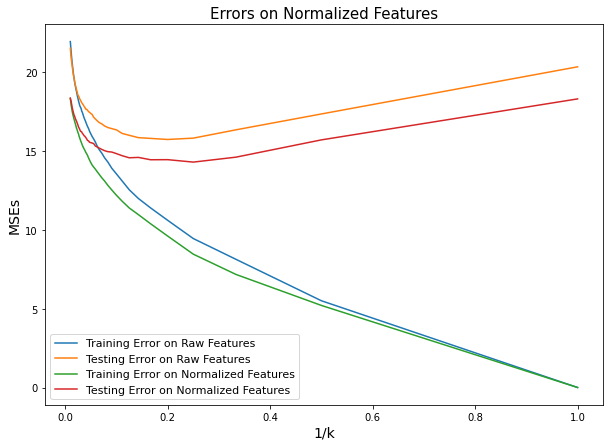

In [29]:
# Plot the train and test errors against 1/k.
plt.figure(figsize=(10, 7))
plt.plot(err['1/k'], err['Train_Err_Raw'], label="Training Error on Raw Features")
plt.plot(err['1/k'], err['Test_Err_Raw'], label="Testing Error on Raw Features")
plt.plot(err['1/k'], err['Train_Err_Nrml'], label="Training Error on Normalized Features")
plt.plot(err['1/k'], err['Test_Err_Nrml'], label="Testing Error on Normalized Features")
plt.title("Errors on Normalized Features", fontsize=15)
plt.xlabel("1/k", fontsize=14)
plt.ylabel("MSEs", fontsize=14)
plt.legend(fontsize=11)
plt.show()

<b>j) Compare results of KNN Regression with linear regression model that has smallest test error and provide analysis.</b>

In [30]:
# List all test MSEs from linear regression and KNN Regression.
print(f"h) Test MSE of multiple regression (without interaction terms): {mse(y_test, h1_yhat)}.")
print(f"h) Test MSE of regression (with insignficant variables removed): {mse(y_test, h2_yhat)}.")
print(f"i) Test MSE of KNN on raw features: {min(rtest_err.values())}")
print(f"i) Test MSE of KNN on normalized features: {min(stest_err.values())}")

h) Test MSE of multiple regression (without interaction terms): 25.096901176932306.
h) Test MSE of regression (with insignficant variables removed): 18.694346190803575.
i) Test MSE of KNN on raw features: 15.726819842563568
i) Test MSE of KNN on normalized features: 14.291333431295715


Ans: The smallest MSE of KNN is with normalized features (14.291) and the smallest MSE for regression is when insignificant interaction variables are removed (18.694). It makes sense that these models have lower MSEs compared to their counterparts. For the regression, removing insignificnat variables allow the model to not consider these variables when building the models. For the KNN model, normalizing the features will result in better prediction because the features are on different scales in the raw data.<br>
Based on the MSEs, KNN Regression seems to be better model than the linear regression model as overall, the MSEs for KNN is smaller than the MSEs for linear regression. This suggests that a linear model cannot provide an accurate representation of the relationship between the predictors and the response.

<b>2. ISLR: 2.4.1<br>
Indicate whether we would generally expect performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify answer.<br>
    a) Sample size n is extremely large and the number of predictors <i>p</i> is small.</b>

Ans: <u>Flexible</u> statistical learning method may have better performance here because we have small number of predictors with large sample size. This means we do not meed to worry about estimating a large number of parameters. With more sample size, it is also less likely that the flexible method will result in overfitting. However, it should also be noted that linear regression is the usually the best go-to statistical model as it can still capture the general relationship between predictors and response.

<b>b) Number of predictors <i>p</i> is extremely large and the number of observations <i>n</i> is small.</b>

Ans: <u>Inflexible</u> statistical learning method may have better performance here because we have extremely large number of predictors and fitting a flexible model requires a greater number of parameter estimation. This would not be ideal if we already have a lot of predictors. In addition, since we have a small sample size, overfitting is a very valid concern if we use flexible method. Although inflexible models in general have higher bias, overfitting is a more serious concern as we will sacrifice the model's ability to predict unseen datapoints.

<b>c) Relationship between preditors and response is highly non-linear.</b>

Ans: <u>Flexible</u> statistical learning method may be better here. Since the question already stated that the relationship is highly non-linear, an inflexible method is likely to result in high bias as the predicted function will be far off from the true function. However, the concern for overfitting should still be kept in mind.

<b>d) Variance of the error terms σ2 = Var(ε) is extremely high.</b>

Ans: <u>Inflexible</u> statistical learning method may have better performance in this case because Var(ε), the irreducible error, is extremely high. This means that the dataset have a lot of noise, and using a flexible model here will capture too much of the noise from irreducible error.

<b>3. ISLR: 2.4.7<br>
Given six observations, three predictors, and one qualitative response variable. Suppoer we wish to use this dataset to make prediction of Y when X1 = X2 = X3 = 0 using KNN.<br>
Dataset = [[X1, X2, X3, Y], [0, 3, 0, Red], [2, 0, 0, Red], [0, 1, 3, Red], [0, 1, 2, Green], [-1, 0, 1, Green], [1, 1, 1, Red]]<br>    
a) Compute Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.</b>

Ans:

For Obs. 1, Euclidean distance = sqrt((0-0)^2 + (3-0)^2 + (0-0)^2) = sqrt(9) = 3.

For Obs. 2, Euclidean distance = sqrt((2-0)^2 + (0-0)^2 + (0-0)^2) = sqrt(4) = 2.

For Obs. 3, Euclidean distance = sqrt((0-0)^2 + (1-0)^2 + (3-0)^2) = sqrt(10) = 3.162.

For Obs. 4, Euclidean distance = sqrt((0-0)^2 + (1-0)^2 + (2-0)^2) = sqrt(5) = 2.236.

For Obs. 5, Euclidean distance = sqrt((-1-0)^2 + (0-0)^2 + (1-0)^2) = sqrt(2) = 1.414.

For Obs. 6, Euclidean distance = sqrt((1-0)^2 + (1-0)^2 + (1-0)^2) = sqrt(3) = 1.732.

<b>b) What is prediction with K = 1? Why?</b>

Ans: Based on the Euclidean distance calculation, the closest point to test point (0, 0, 0) is Observation 5, which is Green, so the prediction with K = 1 is also <u>green</u>.

<b>c) What is our prediction with K = 3? Why?</b>

Ans: Based on the Euclidean distance calculation, the closest three points to test point (0, 0, 0) are Observation 5, 6, and 2, which are green, red, and red, respectively. Using simple majority, our prediction with K = 3 will be <u>red</u>.

<b>d) If Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?</b>

Ans: We would expect the best value for <u>K to be small</u> since smaller K values yield a more flexible classifier. A more flexible classifier can better classify non-linear relations. Large K will result in an almost linear classification boundary, which is far from the true Bayes decision boundary.

<b>References:</b><br>
1. https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS
2. https://ostwalprasad.github.io/machine-learning/Polynomial-Regression-using-statsmodel.html
3. https://stackoverflow.com/questions/49444262/normalize-data-before-or-after-split-of-training-and-testing-data
4. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
5. ISLR 2.1.1